In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,NaN,3.5,8.00,1,0.72
3,4,322,110,3,NaN,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  2
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,398.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400754,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.009189,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df1=df.fillna(3.08)
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.50,4.5,9.65,1,0.92
1,2,324,107,4,4.00,4.5,8.87,1,0.76
2,3,316,104,3,3.08,3.5,8.00,1,0.72
3,4,322,110,3,3.08,2.5,8.67,1,0.80
4,5,314,103,2,2.00,3.0,8.21,0,0.65


In [8]:
df1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

/Users/vidyaanvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR '>

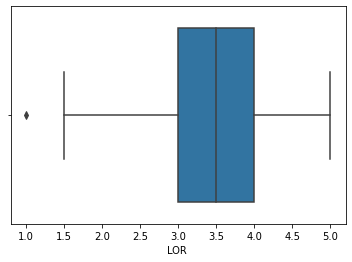

In [9]:
sns.boxplot(df1['LOR '])

In [10]:
def outlier(list):
    import pandas as pd
    df1=pd.Series(list)
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    iqr=q3-q1
    left=q1-(1.5*iqr)
    right=q3+(1.5*iqr)
    ol=[]
    for i in list:
        if i<left or i>right:
            ol.append(i)
    print ('data range', left,'to', right)
    if len(ol)>0:
        print ('Outliers are ', ol)
    else:
        print ('There are no outliers in your data')
    return

In [11]:
outlier(df1['LOR '])

data range 1.5 to 5.5
Outliers are  [1.0]


In [12]:
df1['LOR '].replace(df1['LOR '] <1.4,0,inplace=True)

ValueError: Series.replace cannot use dict-like to_replace and non-None value

In [ ]:
outlier(df1['LOR '])


In [ ]:
sns.boxplot(df1['LOR '])

In [ ]:
corr=df1.corr()
corr

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Analysis')

In [ ]:
x_data=df1.drop(['Serial No.', 'Chance of Admit '], axis=1)
y_data=df1['Chance of Admit ']
print (x_data.head())
print (y_data.head())

In [ ]:
x_data=np.array(x_data)
y_data=np.array(y_data)
x_data

In [ ]:
#Data Splitting

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x_data,y_data, test_size=0.20, random_state=25)
x_train

In [ ]:
y_train

In [ ]:
#Model Development

In [ ]:
#1.step
from sklearn.linear_model import LinearRegression

In [ ]:
#2.create a model object
model=LinearRegression()
model

In [ ]:
#3. Training
model.fit(x_train, y_train)


In [ ]:
print ('intercept value for model', model.intercept_)
print ('slope value for model', model.coef_)


In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
df2=pd.DataFrame({'actual value':y_test, 'predicted value': y_pred})
df2.head() 

In [ ]:
model.score(x_test, y_test)*100

In [ ]:
#Real Time predictions

In [ ]:
GRE_score = int(input('Enter Your GRE Score:'))
TOEFL_score = int(input('Enter Your Toefl Score:'))
university_rating = float(input('Enter Your university rating:'))
SOP = float(input('Enter Your SOP Score:'))
LOR = float(input('Enter Your LOR Score:'))
CGPA = float(input('Enter Your CGPA Score:'))
Research = int(input('do you have research in ur education :'))
prediction = model.predict([[GRE_score, TOEFL_score, university_rating, 
                            SOP, LOR, CGPA, Research]])
print ('Chances of getting application for your profile is', prediction*100)


In [ ]:
df1[220:221]